In [77]:
import pandas as pd
import seaborn as sns
import numpy as np 

In [78]:
logs_data = pd.read_csv('logs.csv')
user_data = pd.read_csv('user_data.csv')
logs_data

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [79]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [80]:
logs_data.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [81]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [82]:
logs_data.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [83]:
user_data.client.describe()

count     2954.000000
mean     50767.886594
std      28800.505847
min         40.000000
25%      25639.500000
50%      51569.500000
75%      75963.250000
max      99973.000000
Name: client, dtype: float64

In [84]:
logs_data.platform.nunique()

3

In [85]:
success_number = logs_data.query('success == True')\
        .groupby('client', as_index = False).agg({'platform': 'count'})\
        .sort_values('platform', ascending = False)\
        .rename(columns= {'platform':'success_number'})

In [86]:
mx_success = success_number.success_number.max()


In [87]:
successful_clients = success_number.query('success_number == @mx_success')\
            .sort_values('client')\
            .client.tolist()

In [88]:
successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [89]:
logs_data.query('success == True').groupby('platform')\
        .agg({'success' : 'count'}).sort_values('success', ascending = False)

,success
platform,
phone,2019
computer,1090
tablet,180


In [90]:
Какая платформа наиболее популярна среди премиумных клиентов?

Object `клиентов` not found.


In [91]:
user_data.merge(logs_data, how = 'inner').query('premium == True').platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

In [104]:
users_data_graph = user_data.merge(logs_data)
users_data_graph

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


C:\Users\e-pan\AppData\Local\Temp\ipykernel_16768\4272627344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_data_graph.query('premium == False').age )
C:\Users\e-pan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\e-pan\AppData\Local\Temp\ipykernel_16768\4272627344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-leve

<Axes: xlabel='age', ylabel='Density'>

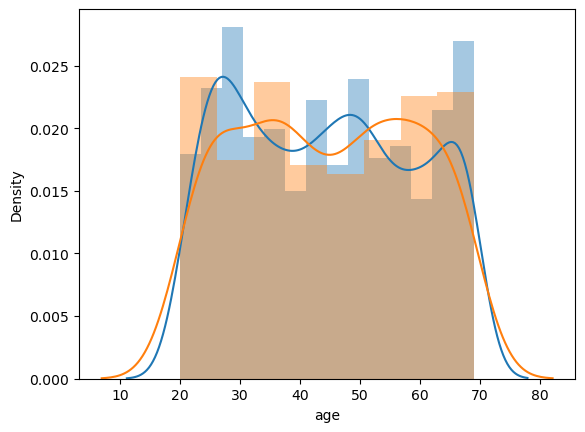

In [108]:
sns.distplot(users_data_graph.query('premium == False').age )
sns.distplot(users_data_graph.query('premium == True').age )

In [109]:
import matplotlib.pyplot as plt

C:\Users\e-pan\AppData\Local\Temp\ipykernel_16768\2140738796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_data_graph.query('premium == False').age, ax=ax[0], color = 'green')
C:\Users\e-pan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\e-pan\AppData\Local\Temp\ipykernel_16768\2140738796.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eithe

<Axes: xlabel='age', ylabel='Density'>

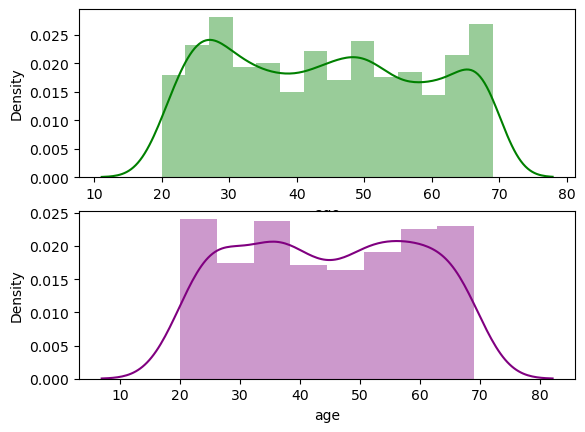

In [113]:
fig, ax = plt.subplots(nrows=2, ncols = 1)
sns.distplot(users_data_graph.query('premium == False').age, ax=ax[0], color = 'green')
sns.distplot(users_data_graph.query('premium == True').age, ax=ax[1], color = 'purple')

In [119]:
logs = logs_data.groupby('client', as_index = False).agg({'success' : 'count'})
logs

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
4006,99927,1
4007,99931,1
4008,99952,1
4009,99973,1


C:\Users\e-pan\AppData\Local\Temp\ipykernel_16768\2229922842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs.success )
C:\Users\e-pan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='success', ylabel='Density'>

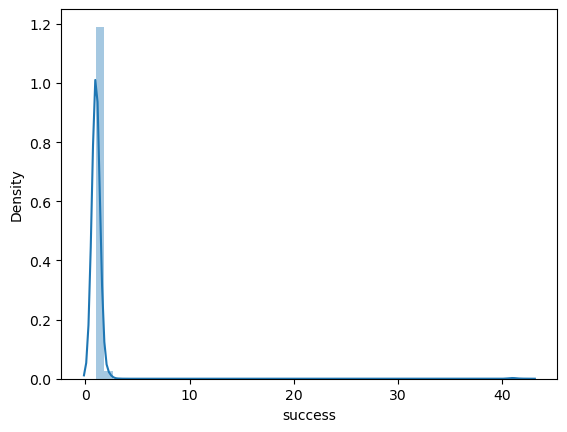

In [120]:
sns.distplot(logs.success )

In [121]:
data = logs_data.merge(user_data)

In [126]:
res = data.query("platform == 'computer'").groupby('age', as_index = False)\
            .agg({'success': 'sum'})


<Axes: xlabel='age', ylabel='success'>

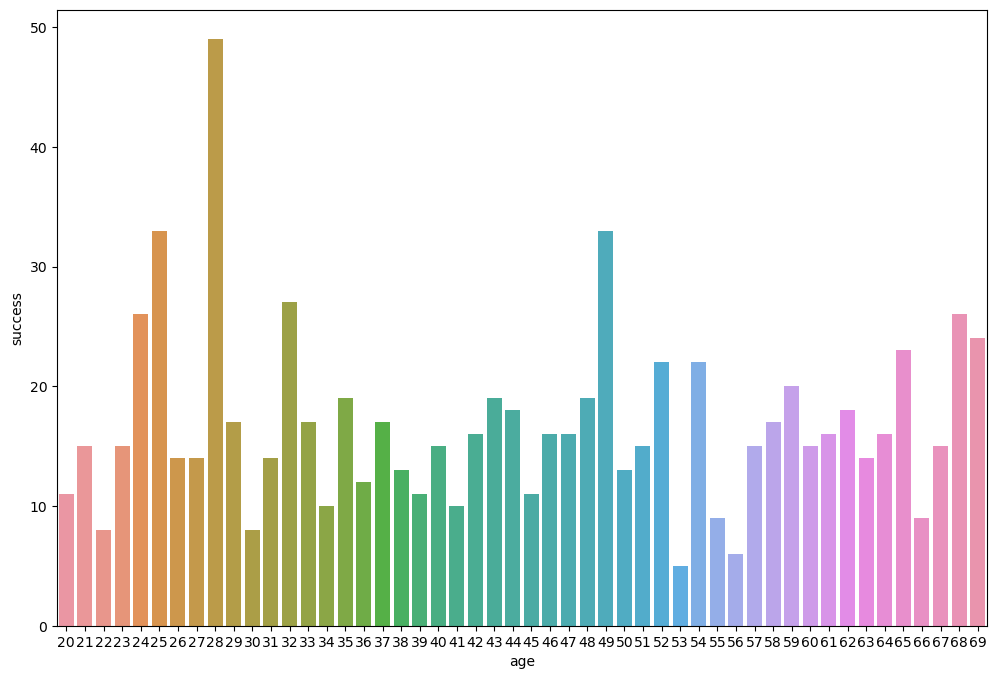

In [128]:
plt.figure(figsize = [12,8])
sns.barplot(x = res.age, y = res.success)